# Exercise: Clustering Algorithms with Scikit Learn

<img src="../IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

Hello students! The following is the initial task in the **Generative Computer Vision Models** module

In [2]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [3]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw datasets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

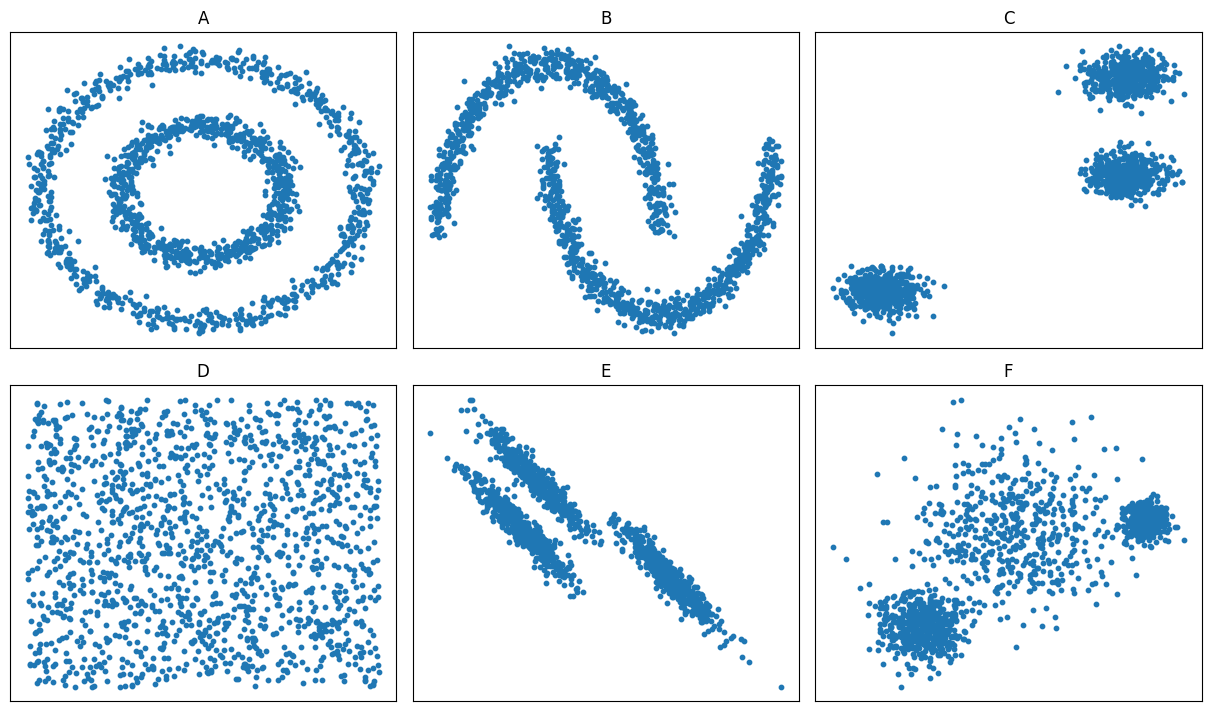

In [12]:
def plot_dataset(dataset, ax, title=None, pad=0.05):
    x = dataset[:, 0]
    y = dataset[:, 1]

    ax.scatter(x, y, s=10)

    x_min, x_max = float(np.min(x)), float(np.max(x))
    y_min, y_max = float(np.min(y)), float(np.max(y))

    x_range = x_max - x_min
    y_range = y_max - y_min
    x_pad = pad * x_range if x_range > 0 else 1.0
    y_pad = pad * y_range if y_range > 0 else 1.0

    ax.set_xlim(x_min - x_pad, x_max + x_pad)
    ax.set_ylim(y_min - y_pad, y_max + y_pad)
    ax.set_xticks(())
    ax.set_yticks(())
    if title is not None:
        ax.set_title(title)

datasets = [A, B, C, D, E, F]
titles = ["A", "B", "C", "D", "E", "F"]

fig = plt.figure(constrained_layout=True, figsize=(12, 7))
subfigs = fig.subfigures(2, 3)
subfigs = np.array(subfigs).reshape(-1)

for subfig, dataset, title in zip(subfigs, datasets, titles):
    ax = subfig.subplots(1, 1)
    plot_dataset(dataset, ax, title=title)

plt.show()

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 Plot all results
* 2.2 Manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 
* 2.4 Learn the optimal value of $k$ using the elbow method 

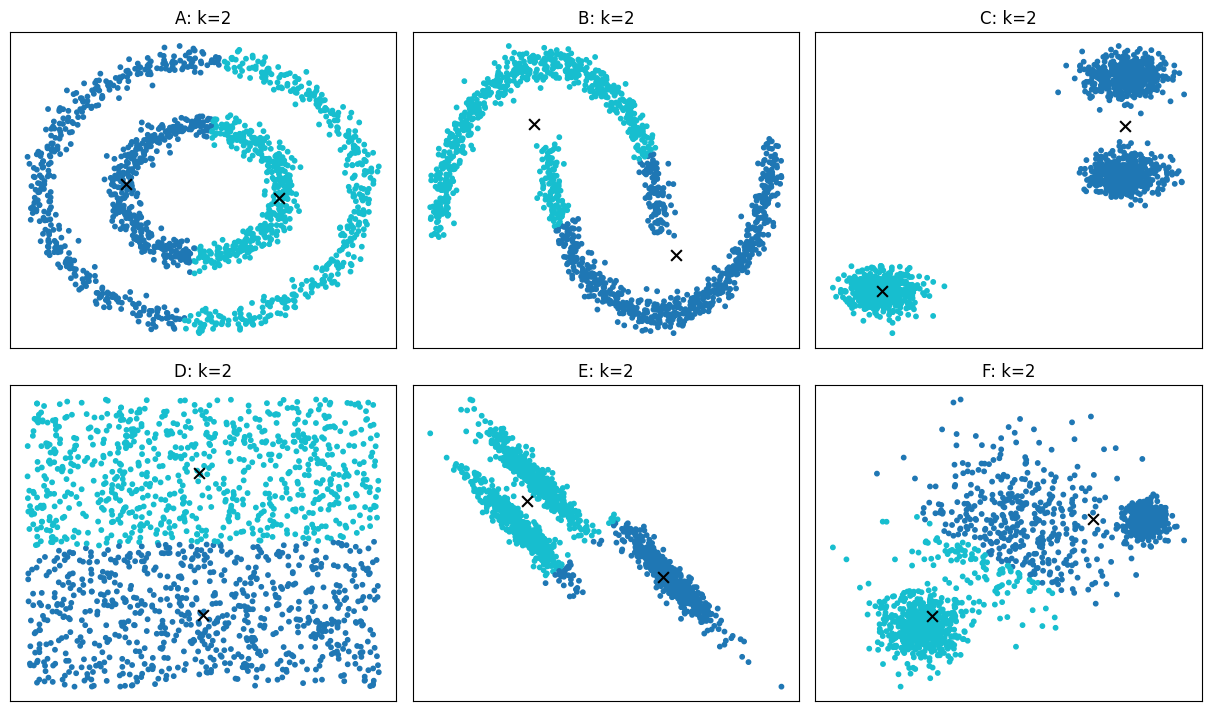

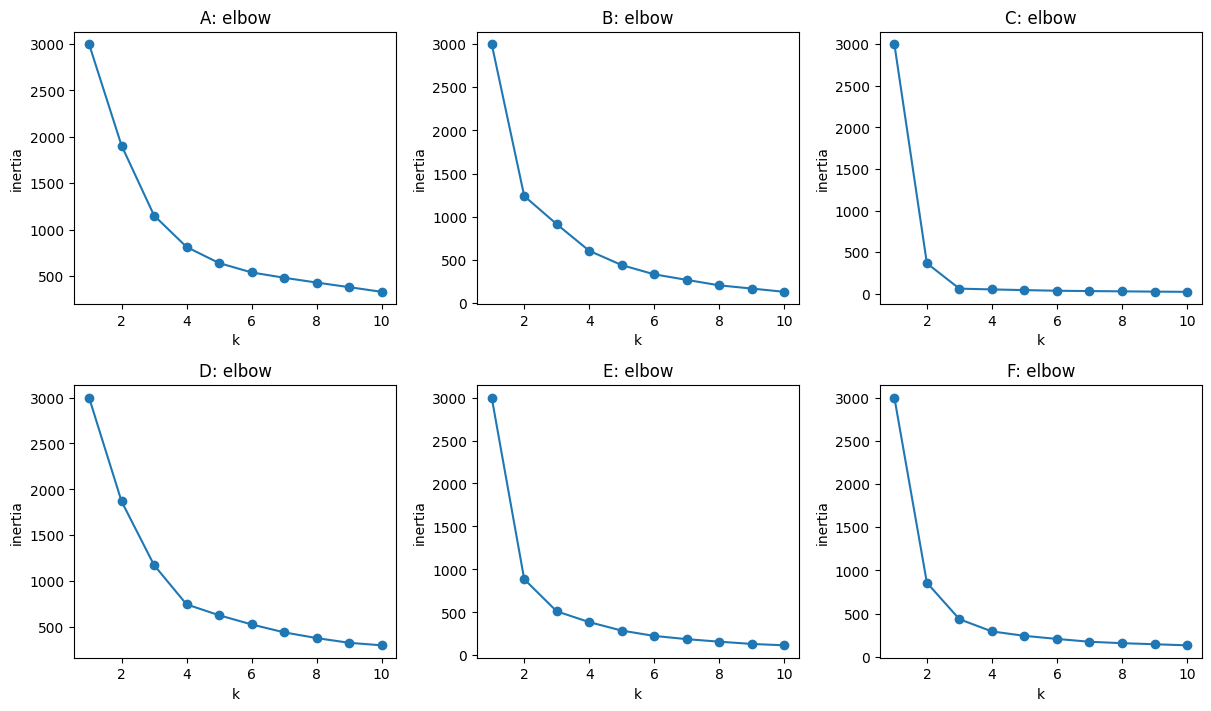

In [16]:
from sklearn.cluster import KMeans

datasets = [A, B, C, D, E, F]
names = ["A", "B", "C", "D", "E", "F"]

k = 2

# 2.1 + 2.3: run K-Means (k-means++ init) and plot results
fig = plt.figure(constrained_layout=True, figsize=(12, 7))
subfigs = np.array(fig.subfigures(2, 3)).reshape(-1)

for subfig, X, name in zip(subfigs, datasets, names):
    ax = subfig.subplots(1, 1)
    Xs = StandardScaler().fit_transform(X)

    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        random_state=random_state,
    )
    labels = kmeans.fit_predict(Xs)

    ax.scatter(Xs[:, 0], Xs[:, 1], c=labels, s=10, cmap="tab10")
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c="black", s=60, marker="x")

    ax.set_title(f"{name}: k={k}")
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# 2.4: elbow method (inertia vs k)
k_range = range(1, 11)
fig = plt.figure(constrained_layout=True, figsize=(12, 7))
subfigs = np.array(fig.subfigures(2, 3)).reshape(-1)

for subfig, X, name in zip(subfigs, datasets, names):
    ax = subfig.subplots(1, 1)
    Xs = StandardScaler().fit_transform(X)

    inertias = []
    for k_ in k_range:
        kmeans = KMeans(
            n_clusters=k_,
            init="k-means++",
            n_init=10,
            random_state=random_state,
        )
        kmeans.fit(Xs)
        inertias.append(kmeans.inertia_)

    ax.plot(list(k_range), inertias, marker="o")
    ax.set_title(f"{name}: elbow")
    ax.set_xlabel("k")
    ax.set_ylabel("inertia")

plt.show()

## Exercise 3
Perform ```DBSCAN``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#dbscan
* 3.1 Plot all results

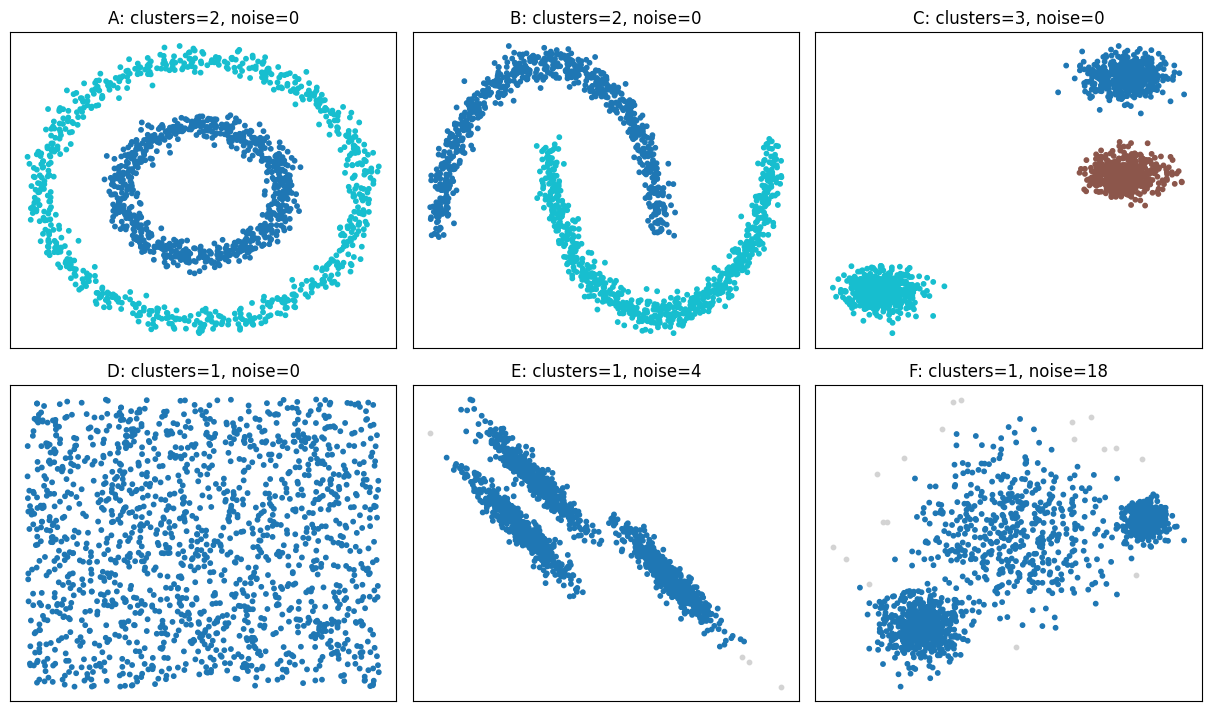

In [27]:
from sklearn.cluster import DBSCAN

# datasets A-F
datasets = [A, B, C, D, E, F]
names = ["A", "B", "C", "D", "E", "F"]

# Tune these two parameters and re-run
eps = 0.3
min_samples = 5

fig = plt.figure(constrained_layout=True, figsize=(12, 7))
subfigs = np.array(fig.subfigures(2, 3)).reshape(-1)

for subfig, X, name in zip(subfigs, datasets, names):
    ax = subfig.subplots(1, 1)
    Xs = StandardScaler().fit_transform(X)

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(Xs)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = int(np.sum(labels == -1))

    # noise points are labeled -1
    noise_mask = labels == -1
    ax.scatter(Xs[~noise_mask, 0], Xs[~noise_mask, 1], c=labels[~noise_mask], s=10, cmap="tab10")
    if np.any(noise_mask):
        ax.scatter(Xs[noise_mask, 0], Xs[noise_mask, 1], c="lightgray", s=10)

    ax.set_title(f"{name}: clusters={n_clusters}, noise={n_noise}")
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

## Exercise 4
Compare the results of both above clustering methods by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [18]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# datasets A-F
datasets = [A, B, C, D, E, F]
names = ["A", "B", "C", "D", "E", "F"]

# Use the parameters from Exercise 2/3 if they exist; otherwise use defaults
k_for_silhouette = globals().get("k", 2)
eps_for_silhouette = globals().get("eps", 0.3)
min_samples_for_silhouette = globals().get("min_samples", 5)

print("Silhouette comparison (higher is better)")
print(f"KMeans: k={k_for_silhouette} | DBSCAN: eps={eps_for_silhouette}, min_samples={min_samples_for_silhouette}")
print("-" * 70)
print(f"{'Dataset':<8} {'KMeans':>10} {'DBSCAN':>10} {'DB clusters':>12} {'DB noise':>10}")
print("-" * 70)

for X, name in zip(datasets, names):
    Xs = StandardScaler().fit_transform(X)

    # K-Means silhouette (requires at least 2 clusters)
    if k_for_silhouette < 2:
        km_score = np.nan
    else:
        km = KMeans(
            n_clusters=int(k_for_silhouette),
            init="k-means++",
            n_init=10,
            random_state=random_state,
        )
        km_labels = km.fit_predict(Xs)
        km_score = silhouette_score(Xs, km_labels)

    # DBSCAN silhouette: compute on non-noise points only
    db = DBSCAN(eps=float(eps_for_silhouette), min_samples=int(min_samples_for_silhouette))
    db_labels = db.fit_predict(Xs)
    non_noise = db_labels != -1
    db_noise = int(np.sum(~non_noise))
    db_unique = np.unique(db_labels[non_noise])
    db_n_clusters = int(len(db_unique))

    if np.sum(non_noise) < 2 or db_n_clusters < 2:
        db_score = np.nan
    else:
        db_score = silhouette_score(Xs[non_noise], db_labels[non_noise])

    km_txt = f"{km_score: .3f}" if np.isfinite(km_score) else "   n/a"
    db_txt = f"{db_score: .3f}" if np.isfinite(db_score) else "   n/a"
    print(f"{name:<8} {km_txt:>10} {db_txt:>10} {db_n_clusters:>12} {db_noise:>10}")

Silhouette comparison (higher is better)
KMeans: k=2 | DBSCAN: eps=0.3, min_samples=5
----------------------------------------------------------------------
Dataset      KMeans     DBSCAN  DB clusters   DB noise
----------------------------------------------------------------------
A             0.353      0.113            2          0
B             0.500      0.394            2          0
C             0.805      0.810            3          0
D             0.355        n/a            1          0
E             0.616        n/a            1          4
F             0.626        n/a            1         18


## Optional Task
Perform ```SpectralClustering``` clustering on all data sets:https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering
* Plot the results

/Users/adrian/dev/master/s4/gcvm/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/adrian/dev/master/s4/gcvm/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/adrian/dev/master/s4/gcvm/.venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


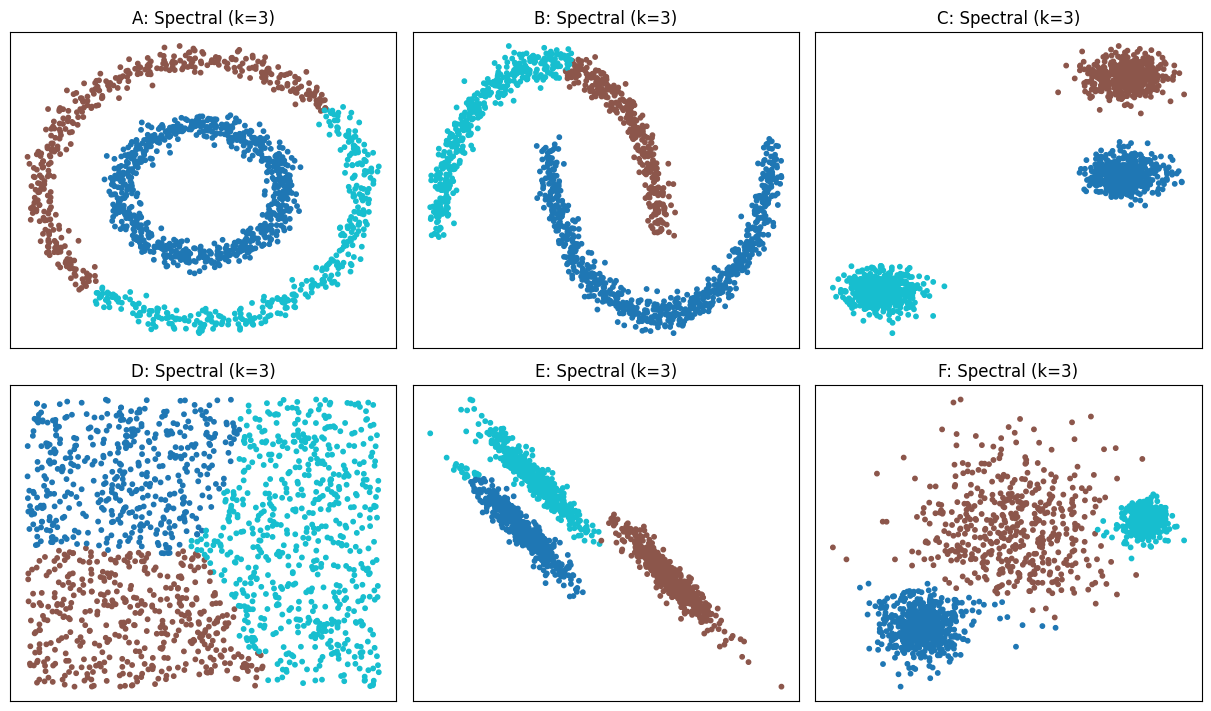

In [20]:
from sklearn.cluster import SpectralClustering

# datasets A-F
datasets = [A, B, C, D, E, F]
names = ["A", "B", "C", "D", "E", "F"]

# Choose the number of clusters, then re-run
n_clusters = 3
n_neighbors = 10

fig = plt.figure(constrained_layout=True, figsize=(12, 7))
subfigs = np.array(fig.subfigures(2, 3)).reshape(-1)

for subfig, X, name in zip(subfigs, datasets, names):
    ax = subfig.subplots(1, 1)
    Xs = StandardScaler().fit_transform(X)

    sc = SpectralClustering(
        n_clusters=n_clusters,
        affinity="nearest_neighbors",
        n_neighbors=n_neighbors,
        assign_labels="kmeans",
        random_state=random_state,
    )
    labels = sc.fit_predict(Xs)

    ax.scatter(Xs[:, 0], Xs[:, 1], c=labels, s=10, cmap="tab10")
    ax.set_title(f"{name}: Spectral (k={n_clusters})")
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()